Autores: Eric Heresi Medina & Alberto García Doménech

# Análisis Grafo Marvel Characters

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections as col
#Utilizando community detection de python-louvain
import community as com

Matplotlib is building the font cache; this may take a moment.


In [2]:
#importar el grafo en forma de lista de nodos y lista de aristas,
#formamos el grafo de networkx a través del de aritas de pandas

nodos = pd.read_csv("nodosEntero.csv")
nodos = nodos.drop(["timeset"], axis=1)
nodos = nodos.sort_values('Degree', ascending = False)
aristas = pd.read_csv("Aristas.csv")
aristas = aristas.drop(["Type","Id","Label","timeset"], axis=1)
G = nx.from_pandas_edgelist(aristas,"Source","Target","Weight")

## Grafo Completo

In [3]:
#Se generan particiones automáticamente mediante el algoritmo de Louvain de detección de comunidades
#Se cuenta cuantos elementos contiene cada grupo

partition = com.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
counter=col.Counter(values)
print(counter)

Counter({1: 3665, 3: 1639, 5: 1357, 4: 1334, 6: 770, 2: 378, 0: 237, 19: 218, 8: 214, 7: 170, 10: 143, 11: 59, 12: 55, 13: 34, 14: 30, 9: 23, 26: 18, 21: 15, 15: 9, 18: 9, 25: 9, 20: 8, 24: 8, 17: 7, 23: 7, 28: 7, 32: 7, 16: 6, 33: 5, 35: 5, 22: 4, 27: 3, 29: 3, 30: 3, 31: 3, 36: 3, 34: 2, 37: 2})


In [4]:
#podemos mapear los elementos obtenidos a los nodos con las etiquetas de los personajes con un map
nodos_comp = nodos
nodos_comp["Group"] = nodos_comp["Id"].map(partition)
nodos_comp.head()

,Id,Label,Degree,Group
6,10476,IRON MAN/TONY STARK,2189,1
86,10556,WOLVERINE/LOGAN,1984,1
81,10551,CAPTAIN AMERICA,1896,3
71,10541,SCARLET WITCH/WANDA,1883,1
88,10558,VISION,1765,1


In [5]:
#Numero de nodos
N = G.number_of_nodes()
print(f"Nodos: {N}")

#Numero de aristas
L = G.number_of_edges()
print(f"Aristas: {L}")

#Densidad: numero de aristas en relación al máximo posible de aristas con esa cantidad de nodos.
print(f"Densidad: {nx.density(G)}")

#numero de componentes conexas
print(f"Numero de componentes conexas: {nx.number_connected_components(G)}")

#Grado medio
average_degree = 2* L / N
print(f"Grado medio: {average_degree}")

Nodos: 10469
Aristas: 178115
Densidad: 0.0032505853754664724
Numero de componentes conexas: 8
Grado medio: 34.027127710383034


In [6]:
#transitividad: relación de tríadas cerradas respecto al número de tríadas abiertas de la red
print(f"Transitividad: {nx.transitivity(G)}")

Transitividad: 0.1413301582018682


## Grafo Reducido

Hemos reducido el grafo para añadirle visibilidad eliminando los nodos de menor grado, pero manteniendo los grupos que se han generado anteriormente. Así nos centramos en los personajes más relevantes de cada grupo.

In [10]:
g = G
remove = [node for node,degree in dict(g.degree()).items() if degree < 50]
g.remove_nodes_from(remove)
nodos_group = nodos.drop(nodos[nodos.Degree < 50].index)

In [13]:
values = [partition.get(node) for node in g.nodes()]
counter=col.Counter(values)
print(counter)

Counter({3: 289, 5: 287, 6: 208, 4: 121, 2: 87, 8: 51, 1: 43, 0: 17, 7: 16, 10: 2})


In [14]:
colores = values
#gray, maroon, red, olive, yellow, green, lime, teal, aqua, navy, purple, fuchsia
# 0,     1,     2,    3,     4,      5,     6,    7,    8,   9,    10,      16
color_map = {0:"#808080", 1:"#800000", 2:"#ff0000", 3:"#808000", 4:"#ffff00", 5:"#008000", 6:"#00ff00", 7:"#008080", 8:"#00ffff", 9:"#000080", 10: "#800080", 16:"#ff00ff"}
colores = [color_map[k] for k in colores]

Como se puede observar el número de grupos ha disminuido e incluso hay grupos que se han reducido hasta llegar a ser de solo uno o dos miembros. 

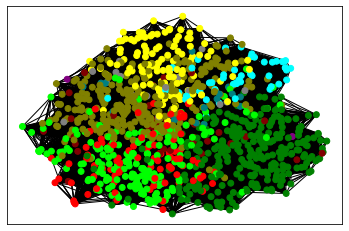

In [15]:
#usando el spring layout para conseguir un Force-directed graph drawing
sp = nx.spring_layout(g)
nx.draw_networkx(g, pos=sp, with_labels=False, node_size=35, node_color=colores)
#plt.axes('off')
plt.show()

###faltaría mapear los colores para poder averiguar, por ejemplo, cuál es la comunidad amarilla.

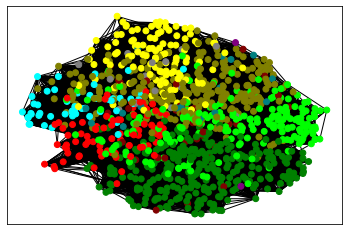

In [16]:
#usando el layout de fruchterman_reingold
sp = nx.fruchterman_reingold_layout(g)
nx.draw_networkx(g, pos=sp, with_labels=False, node_size=35, node_color=colores)
#plt.axes('off')
plt.show()

In [17]:
#Numero de nodos
N = g.number_of_nodes()
print(f"Nodos: {N}")

#Numero de aristas
L = g.number_of_edges()
print(f"Aristas: {L}")

#Densidad: numero de aristas en relación al máximo posible de aristas con esa cantidad de nodos.
print(f"Densidad: {nx.density(g)}")

#numero de componentes conexas
print(f"Numero de componentes conexas: {nx.number_connected_components(g)}")

#Grado medio
average_degree = 2* L / N
print(f"Grado medio: {average_degree}")

Nodos: 1121
Aristas: 74646
Densidad: 0.11890850006371861
Numero de componentes conexas: 1
Grado medio: 133.17752007136485


In [18]:
#distancia media entre nodos
print(f"Distancia media: {nx.average_shortest_path_length(g)}")

#radio: Valor minimo de excentricidad
print(f"Radio: {nx.radius(g)}")

#transitividad: relación de tríadas cerradas respecto al número de tríadas abiertas de la red
print(f"Transitividad: {nx.transitivity(g)}")

Distancia media: 1.8896855486173059
Radio: 2
Transitividad: 0.3436859427561003


In [21]:
# nodos_group = nodos.drop(nodos[nodos.Degree < 50].index)
nodos_group = nodos_group.sort_values('Group', ascending = False)
nodos_group.loc[nodos_group['Group'] == 1].sort_values('Degree', ascending = False)
##necesitamos la lista completa de nodos para poder cortarla de la misma forma que cortamos al grafo

,Id,Label,Degree,Group
6,10476,IRON MAN/TONY STARK,2189,1
86,10556,WOLVERINE/LOGAN,1984,1
71,10541,SCARLET WITCH/WANDA,1883,1
88,10558,VISION,1765,1
101,10571,INVISIBLE WOMAN/SUE,1750,1
...,...,...,...,...
5834,16304,DR. SPECTRUM II/DR.,53,1
356,10826,",""THOR/DR. DONALD BLAK",52,1
135,10605,",""HULK/DR. ROBERT BRUC",51,1
114,10584,",""WOLVERINE/LOGAN",51,1


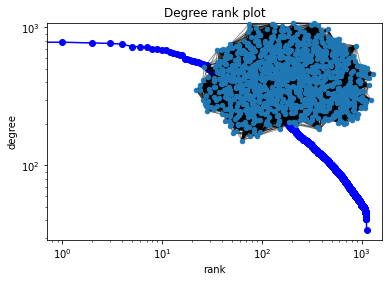

In [23]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()

In [24]:
sorted(g.degree, key=lambda x: x[1], reverse=True)

[(10551, 918),
 (10532, 780),
 (10570, 770),
 (10565, 765),
 (10747, 755),
 (10575, 726),
 (10625, 722),
 (10557, 722),
 (10774, 701),
 (10577, 693),
 (10566, 681),
 (10561, 680),
 (10843, 665),
 (10553, 651),
 (10539, 646),
 (10530, 633),
 (10829, 629),
 (10542, 589),
 (10560, 586),
 (10521, 579),
 (10504, 572),
 (10556, 571),
 (10541, 564),
 (10476, 560),
 (10558, 554),
 (10953, 545),
 (11263, 543),
 (11289, 536),
 (10571, 531),
 (10559, 499),
 (10679, 493),
 (10535, 487),
 (10472, 478),
 (10656, 467),
 (10711, 466),
 (10940, 463),
 (10525, 458),
 (10538, 439),
 (10638, 435),
 (10738, 429),
 (10706, 428),
 (11979, 418),
 (10844, 414),
 (10550, 411),
 (10790, 410),
 (11364, 408),
 (10818, 408),
 (10800, 401),
 (10534, 394),
 (10805, 393),
 (10769, 393),
 (10827, 385),
 (10528, 383),
 (11674, 378),
 (11375, 377),
 (10552, 377),
 (11557, 376),
 (11469, 373),
 (10526, 371),
 (10632, 371),
 (11508, 369),
 (10983, 369),
 (10537, 365),
 (11911, 354),
 (11816, 354),
 (11165, 352),
 (11271, 3

In [28]:
nodos_group.loc[nodos_group['Id'] == 10551]

,Id,Label,Degree,Group
81,10551,CAPTAIN AMERICA,1896,3


## Grafo reducido con nuevas comunidades

In [29]:
partition = com.best_partition(g)
values = [partition.get(node) for node in g.nodes()]
counter=col.Counter(values)
print(counter)

Counter({4: 270, 0: 188, 5: 178, 3: 167, 6: 167, 1: 95, 2: 56})


In [51]:
nodos_comp = nodos
nodos_comp["Group"] = nodos_comp["Id"].map(partition)
nodos_comp.head()

,Id,Label,Degree,Group
6,10476,IRON MAN/TONY STARK,2189,0.0
86,10556,WOLVERINE/LOGAN,1984,3.0
81,10551,CAPTAIN AMERICA,1896,1.0
71,10541,SCARLET WITCH/WANDA,1883,1.0
88,10558,VISION,1765,1.0


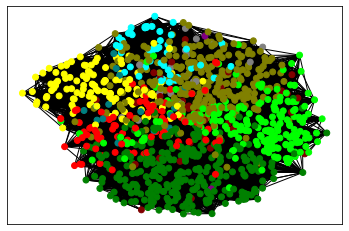

In [30]:
#usando el spring layout para conseguir un Force-directed graph drawing
sp = nx.spring_layout(g)
nx.draw_networkx(g, pos=sp, with_labels=False, node_size=35, node_color=colores)
#plt.axes('off')
plt.show()

In [39]:
# nodos_group = nodos.drop(nodos[nodos.Degree < 50].index)
nodos_group = nodos_group.sort_values('Group', ascending = False)
nodos_group.loc[nodos_group['Group'] == 7].sort_values('Degree', ascending = False)
##necesitamos la lista completa de nodos para poder cortarla de la misma forma que cortamos al grafo

,Id,Label,Degree,Group
348,10818,"CAGE, LUKE/CARL LUCA",601,7
1441,11911,IRON FIST/DANIEL RAN,545,7
1428,11898,"KNIGHT, MISTY",324,7
2287,12757,"WING, COLLEEN",229,7
931,11401,SUPER SKRULL/KL'RT,169,7
2933,13403,"HOGARTH, JERYN",133,7
1711,12181,STRIDER,129,7
17,10487,SHANG-CHI,126,7
3570,14040,WHITE TIGER II/,124,7
3046,13516,"SCARFE, RAFAEL",98,7


## Grafo Reducido >70

In [40]:
g = G
remove = [node for node,degree in dict(g.degree()).items() if degree < 70]
g.remove_nodes_from(remove)
nodos_group = nodos.drop(nodos[nodos.Degree < 70].index)

In [41]:
partition = com.best_partition(g)
values = [partition.get(node) for node in g.nodes()]
counter=col.Counter(values)
print(counter)

Counter({1: 208, 3: 188, 0: 133, 4: 108, 2: 92, 5: 26})


In [55]:
nodos_comp = nodos
nodos_comp["Group"] = nodos_comp["Id"].map(partition)
nodos_comp.head()

,Id,Label,Degree,Group
6,10476,IRON MAN/TONY STARK,2189,0.0
86,10556,WOLVERINE/LOGAN,1984,3.0
81,10551,CAPTAIN AMERICA,1896,1.0
71,10541,SCARLET WITCH/WANDA,1883,1.0
88,10558,VISION,1765,1.0


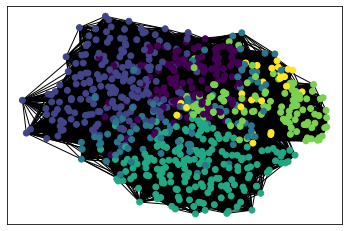

In [43]:
#usando el spring layout para conseguir un Force-directed graph drawing
sp = nx.spring_layout(g)
nx.draw_networkx(g, pos=sp, with_labels=False, node_size=35, node_color=values)
#plt.axes('off')
plt.show()

In [60]:
# nodos_group = nodos.drop(nodos[nodos.Degree < 70].index)
nodos_group = nodos_group.sort_values('Group', ascending = False)
nodos_group.loc[nodos_group['Group'] == 3].sort_values('Degree', ascending = False)
##necesitamos la lista completa de nodos para poder cortarla de la misma forma que cortamos al grafo

,Id,Label,Degree,Group
81,10551,CAPTAIN AMERICA,1896,3
100,10570,THING/BENJAMIN J. GR,1404,3
95,10565,MR. FANTASTIC/REED R,1368,3
277,10747,HUMAN TORCH/JOHNNY S,1349,3
69,10539,HAWK,1165,3
...,...,...,...,...
3602,14072,SWORDSMAN II/COTATI,70,3
2624,13094,METEORITE,70,3
2652,13122,MOONHUNTER/ZACK MOON,70,3
1327,11797,CHONDU,70,3


In [59]:
nodos_group.loc[nodos_group['Id'] ==10530]

,Id,Label,Degree,Group
60,10530,HULK/DR. ROBERT BRUC,1048,3
